## Task 3 - Customer Segmentation analysis using python

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Loading the dataset

In [2]:
df= pd.read_csv(r"C:\Users\Admin\Downloads\INTERNSAVY\Customer Segmentation analysis using python\Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

In [4]:
df.drop('CustomerID', axis=1, inplace=True)  # Drop the CustomerID column

In [5]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [6]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Include 'Age' as a relevant feature

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Evaluate optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Trying clusters from 2 to 10
for k in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg_clustering.fit_predict(X_scaled)
    linkage_matrix = linkage(X_scaled, method='ward')
    inertia.append(linkage_matrix[-1, 2])  # Use the last value of the linkage matrix to get the within-cluster sum of squares
    silhouette_scores.append(silhouette_score(X_scaled, labels))

## Plot elbow method

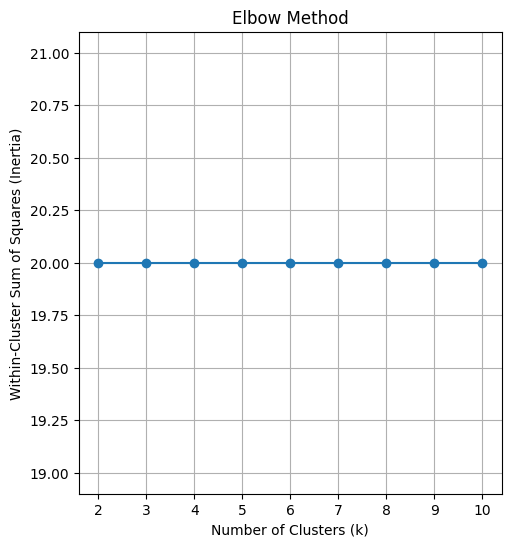

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.grid()

## Plot silhouette scores

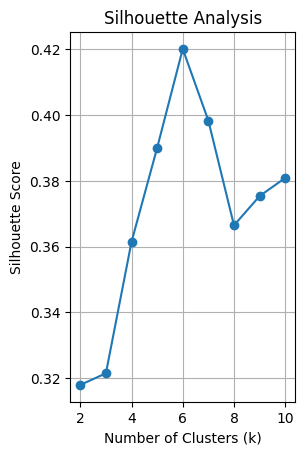

In [10]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid()
plt.show()

## Apply Agglomerative Clustering with the optimal number of clusters

In [11]:
optimal_clusters = 5  # Choose the optimal number of clusters based on the analysis from Step 1
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
df['Cluster'] = agg_clustering.fit_predict(X_scaled)
# Calculate cluster means
cluster_means = df.groupby('Cluster').mean()

## Print the cluster means

In [12]:
print(cluster_means)

               Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Cluster                                                                    
0        26.560606           47.363636               56.787879     0.393939
1        56.400000           55.288889               48.355556     0.466667
2        32.692308           86.538462               82.128205     0.461538
3        43.892857           91.285714               16.678571     0.500000
4        44.318182           25.772727               20.272727     0.409091


## Visualize the cluster means

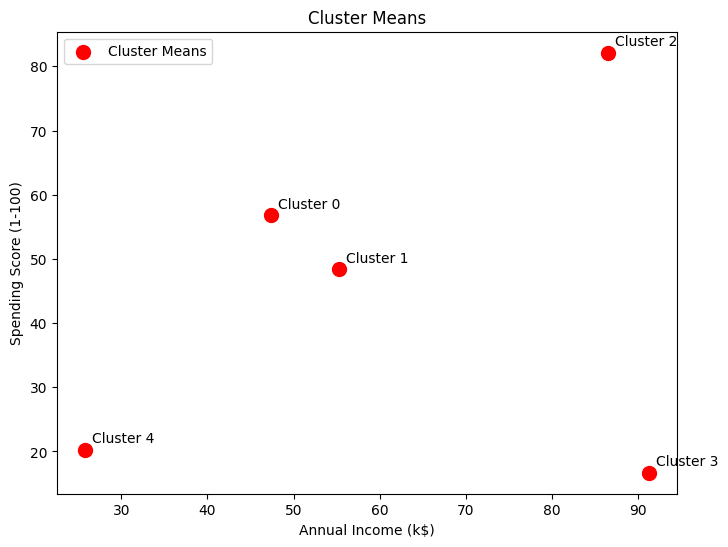

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_means['Annual Income (k$)'], cluster_means['Spending Score (1-100)'], s=100, c='red', label='Cluster Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
for i in range(len(cluster_means)):
    plt.annotate(f'Cluster {i}', (cluster_means.iloc[i]['Annual Income (k$)'], cluster_means.iloc[i]['Spending Score (1-100)']), xytext=(5, 5), textcoords='offset points', fontsize=10, color='black')
plt.title('Cluster Means')
plt.legend()
plt.show()

## Conducting a deeper analysis of each cluster

In [14]:
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} Characteristics:")
    print(cluster_data.describe())


Cluster 0 Characteristics:
             Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
count  66.000000           66.000000               66.000000    66.000000   
mean   26.560606           47.363636               56.787879     0.393939   
std     7.043008           18.328319               20.628222     0.492366   
min    18.000000           15.000000                5.000000     0.000000   
25%    21.000000           33.000000               46.250000     0.000000   
50%    24.500000           48.000000               55.000000     0.000000   
75%    31.000000           62.000000               73.000000     1.000000   
max    45.000000           81.000000               99.000000     1.000000   

       Cluster  
count     66.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 Characteristics:
             Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
count  45.000000    

## Create a scatter plot of the data, colored by cluster

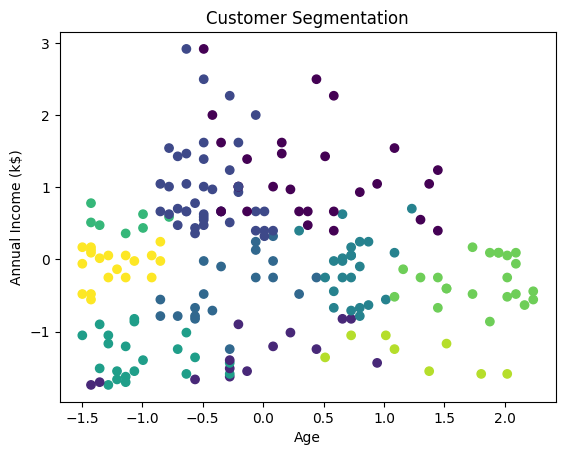

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()
